<a href="https://colab.research.google.com/github/Ahadhassan-2003/Bank-Management-System-Pandas/blob/main/License_plate_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# License Plate detection using Yolo-v11 and easyOCR

### Importing drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Unzipping dataset to "/content"

In [2]:
import zipfile
from pathlib import Path

# Define paths
zip_path = Path("/content/drive/MyDrive/Pakistani License Plates (Merged) - YOLOv11.zip")
extract_to = Path("/content")  # Destination folder

# Extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Dataset unzipped to:", extract_to)

✅ Dataset unzipped to: /content


### Installing dependencies

In [3]:
!pip install ultralytics

import base64

import cv2
import ultralytics
from openai import OpenAI
from ultralytics import YOLO
from ultralytics.utils.downloads import safe_download
from ultralytics.utils.plotting import Annotator, colors

ultralytics.checks()

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.0/235.7 GB disk)


### Option for logger use

In [ ]:
#@title Select YOLO11 🚀 logger {run: 'auto'}
logger = 'TensorBoard' #@param ['TensorBoard', 'Weights & Biases']

if logger == 'TensorBoard':
  !yolo settings tensorboard=True
  %load_ext tensorboard
  %tensorboard --logdir .
elif logger == 'Weights & Biases':
  !yolo settings wandb=True

### Training yolo11m on the dataset

In [ ]:
! yolo task=detect mode=train model=yolo11m.pt data="/content/Pakistani License Plates (Merged) - YOLOv11/data.yaml" epochs=25 imgsz=800 plots=True

100% 38.8M/38.8M [00:00<00:00, 51.2MB/s]
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Pakistani License Plates (Merged) - YOLOv11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=800, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap

### Visualizing results

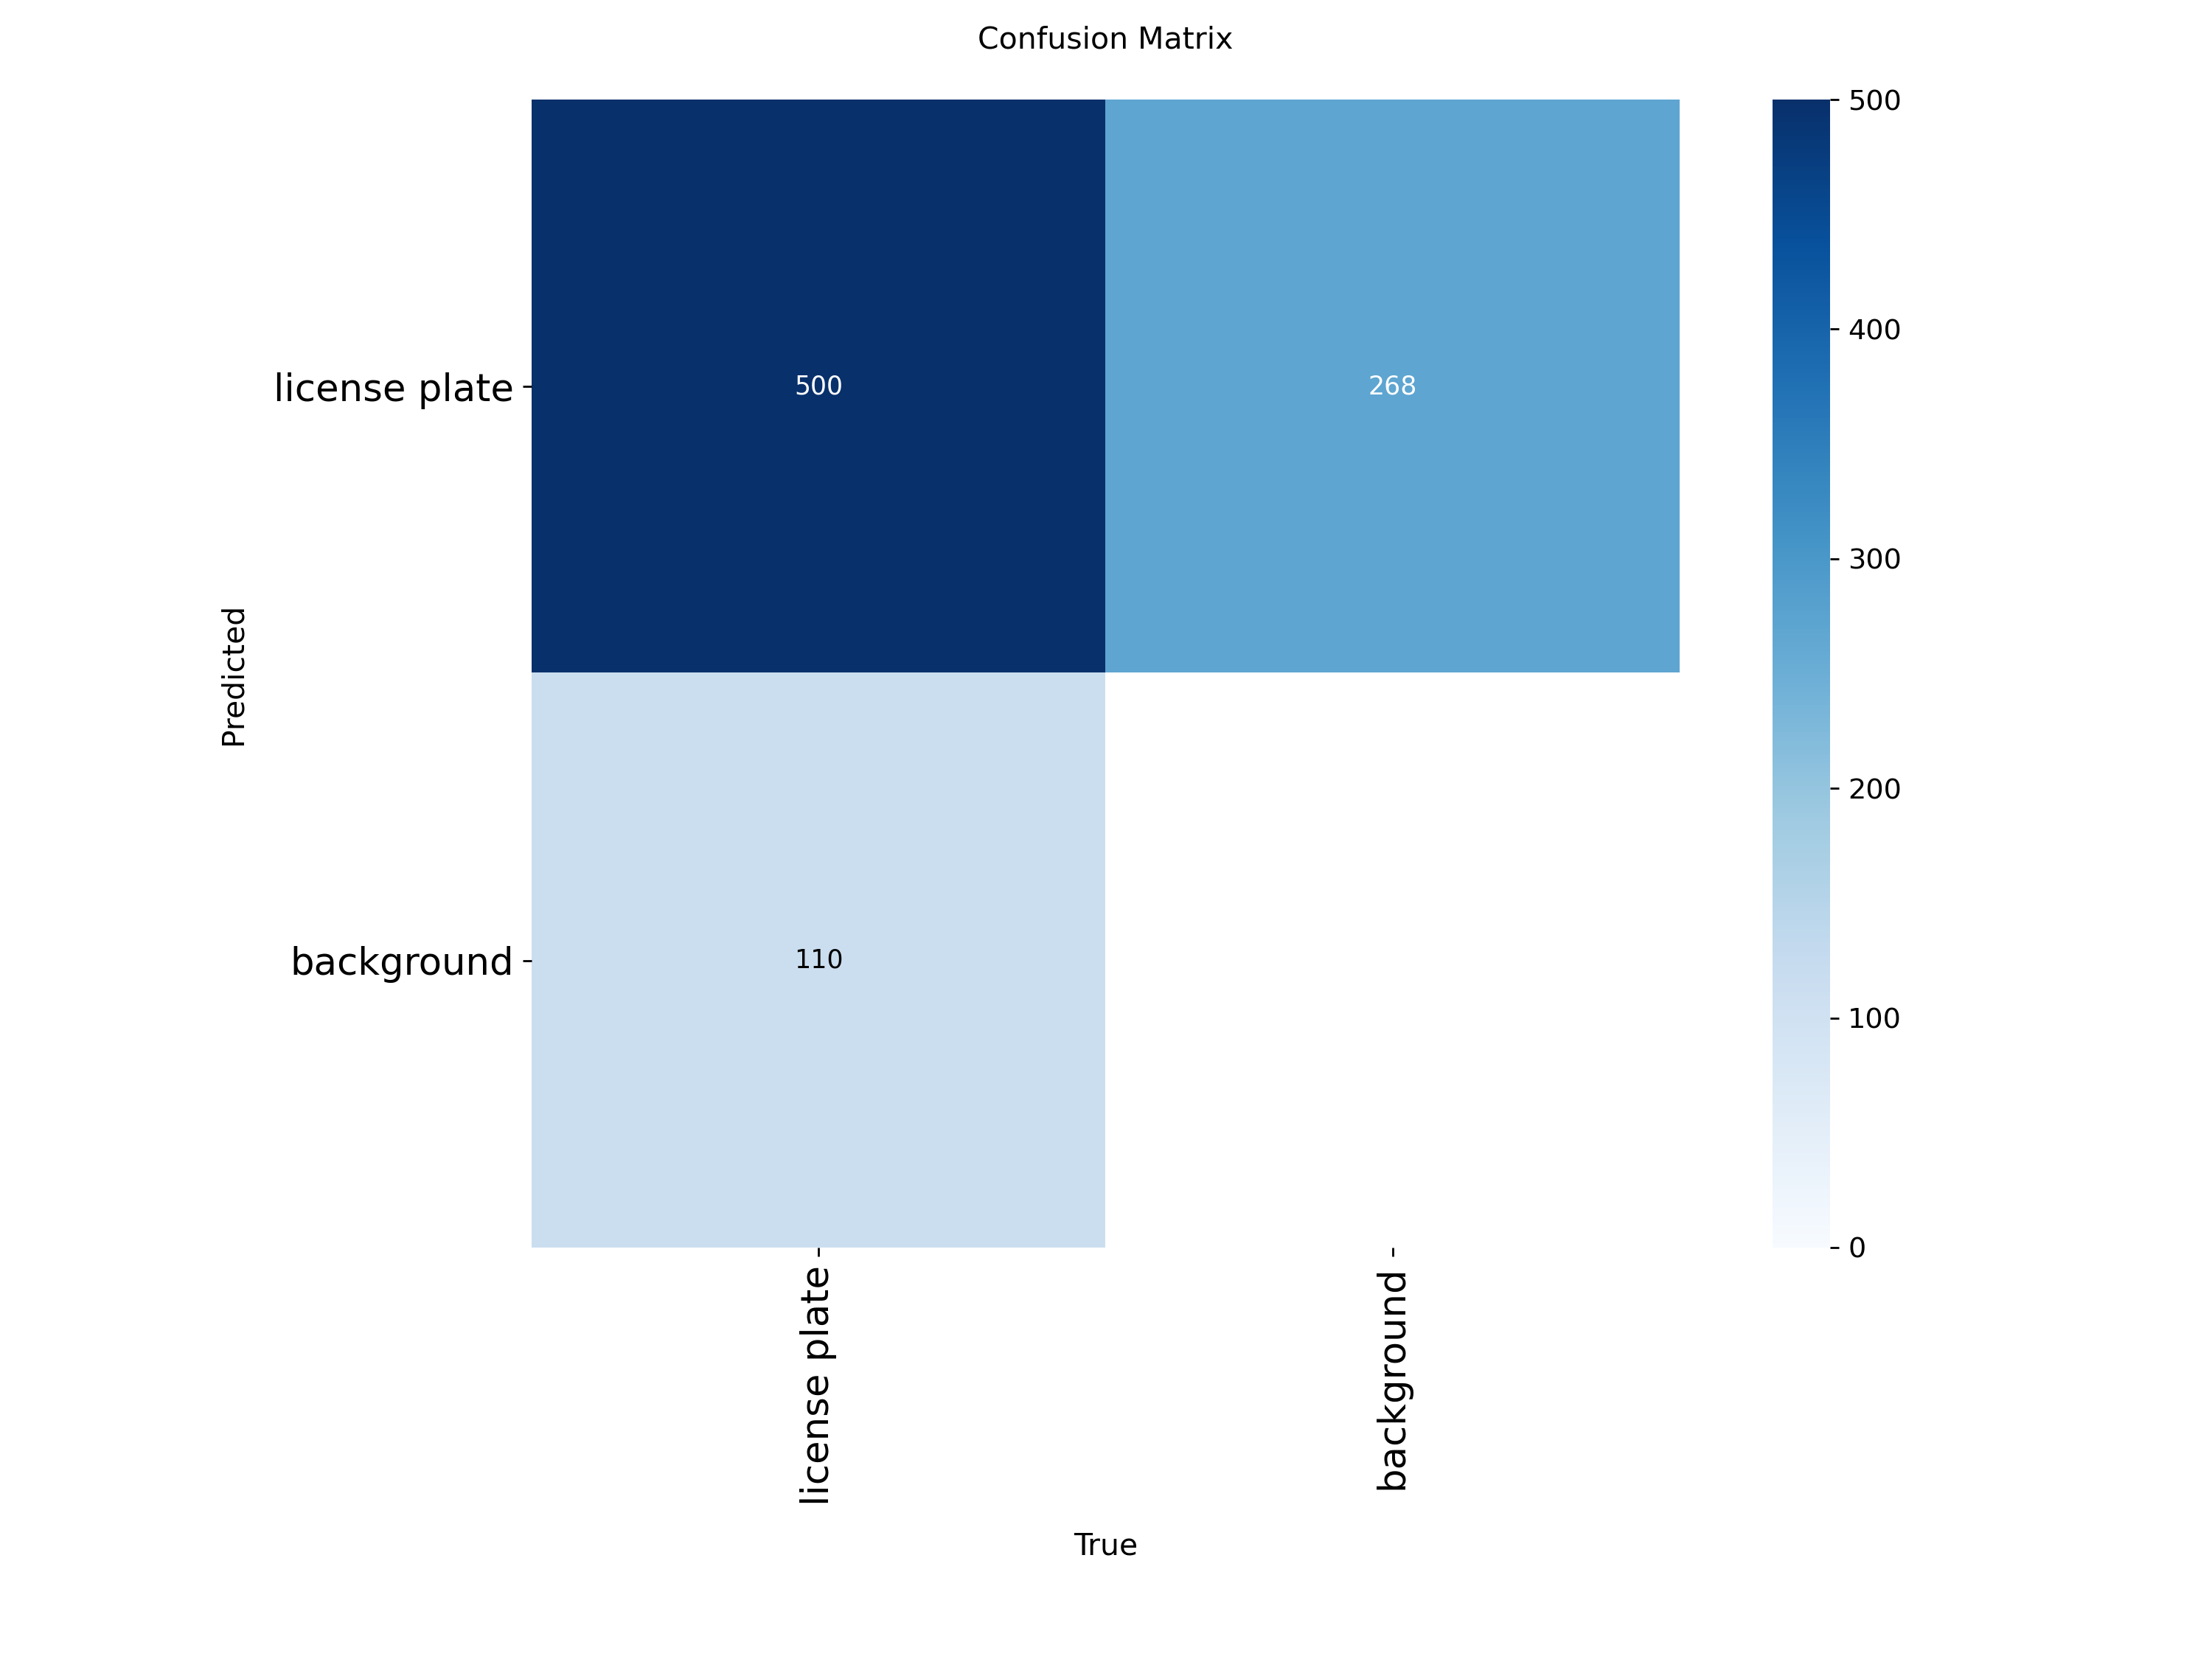

In [ ]:
from IPython.display import display, Image
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

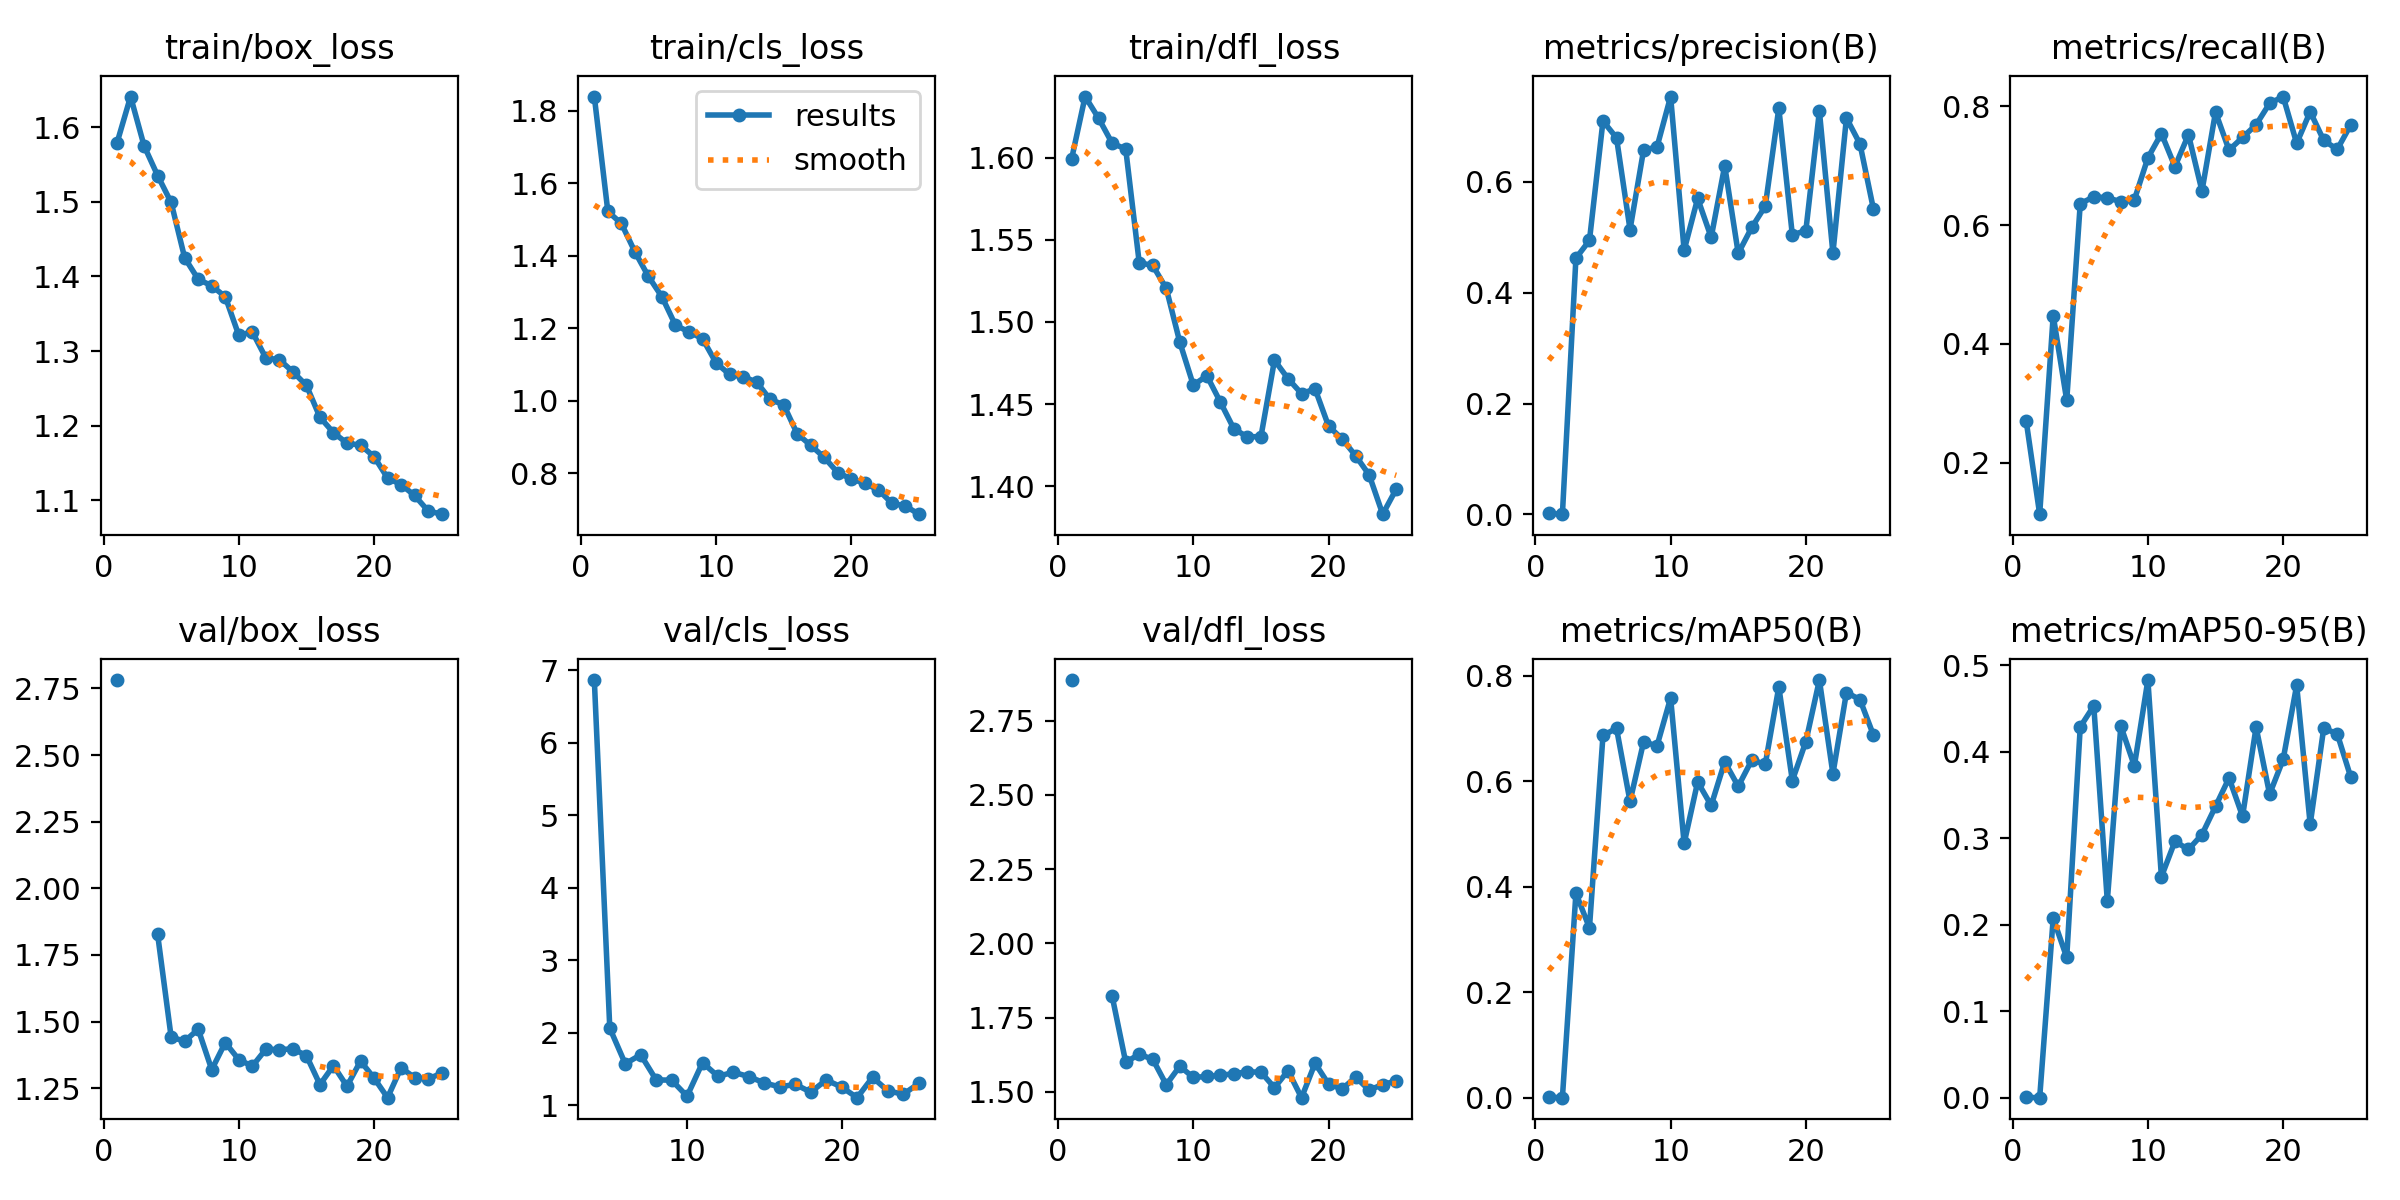

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

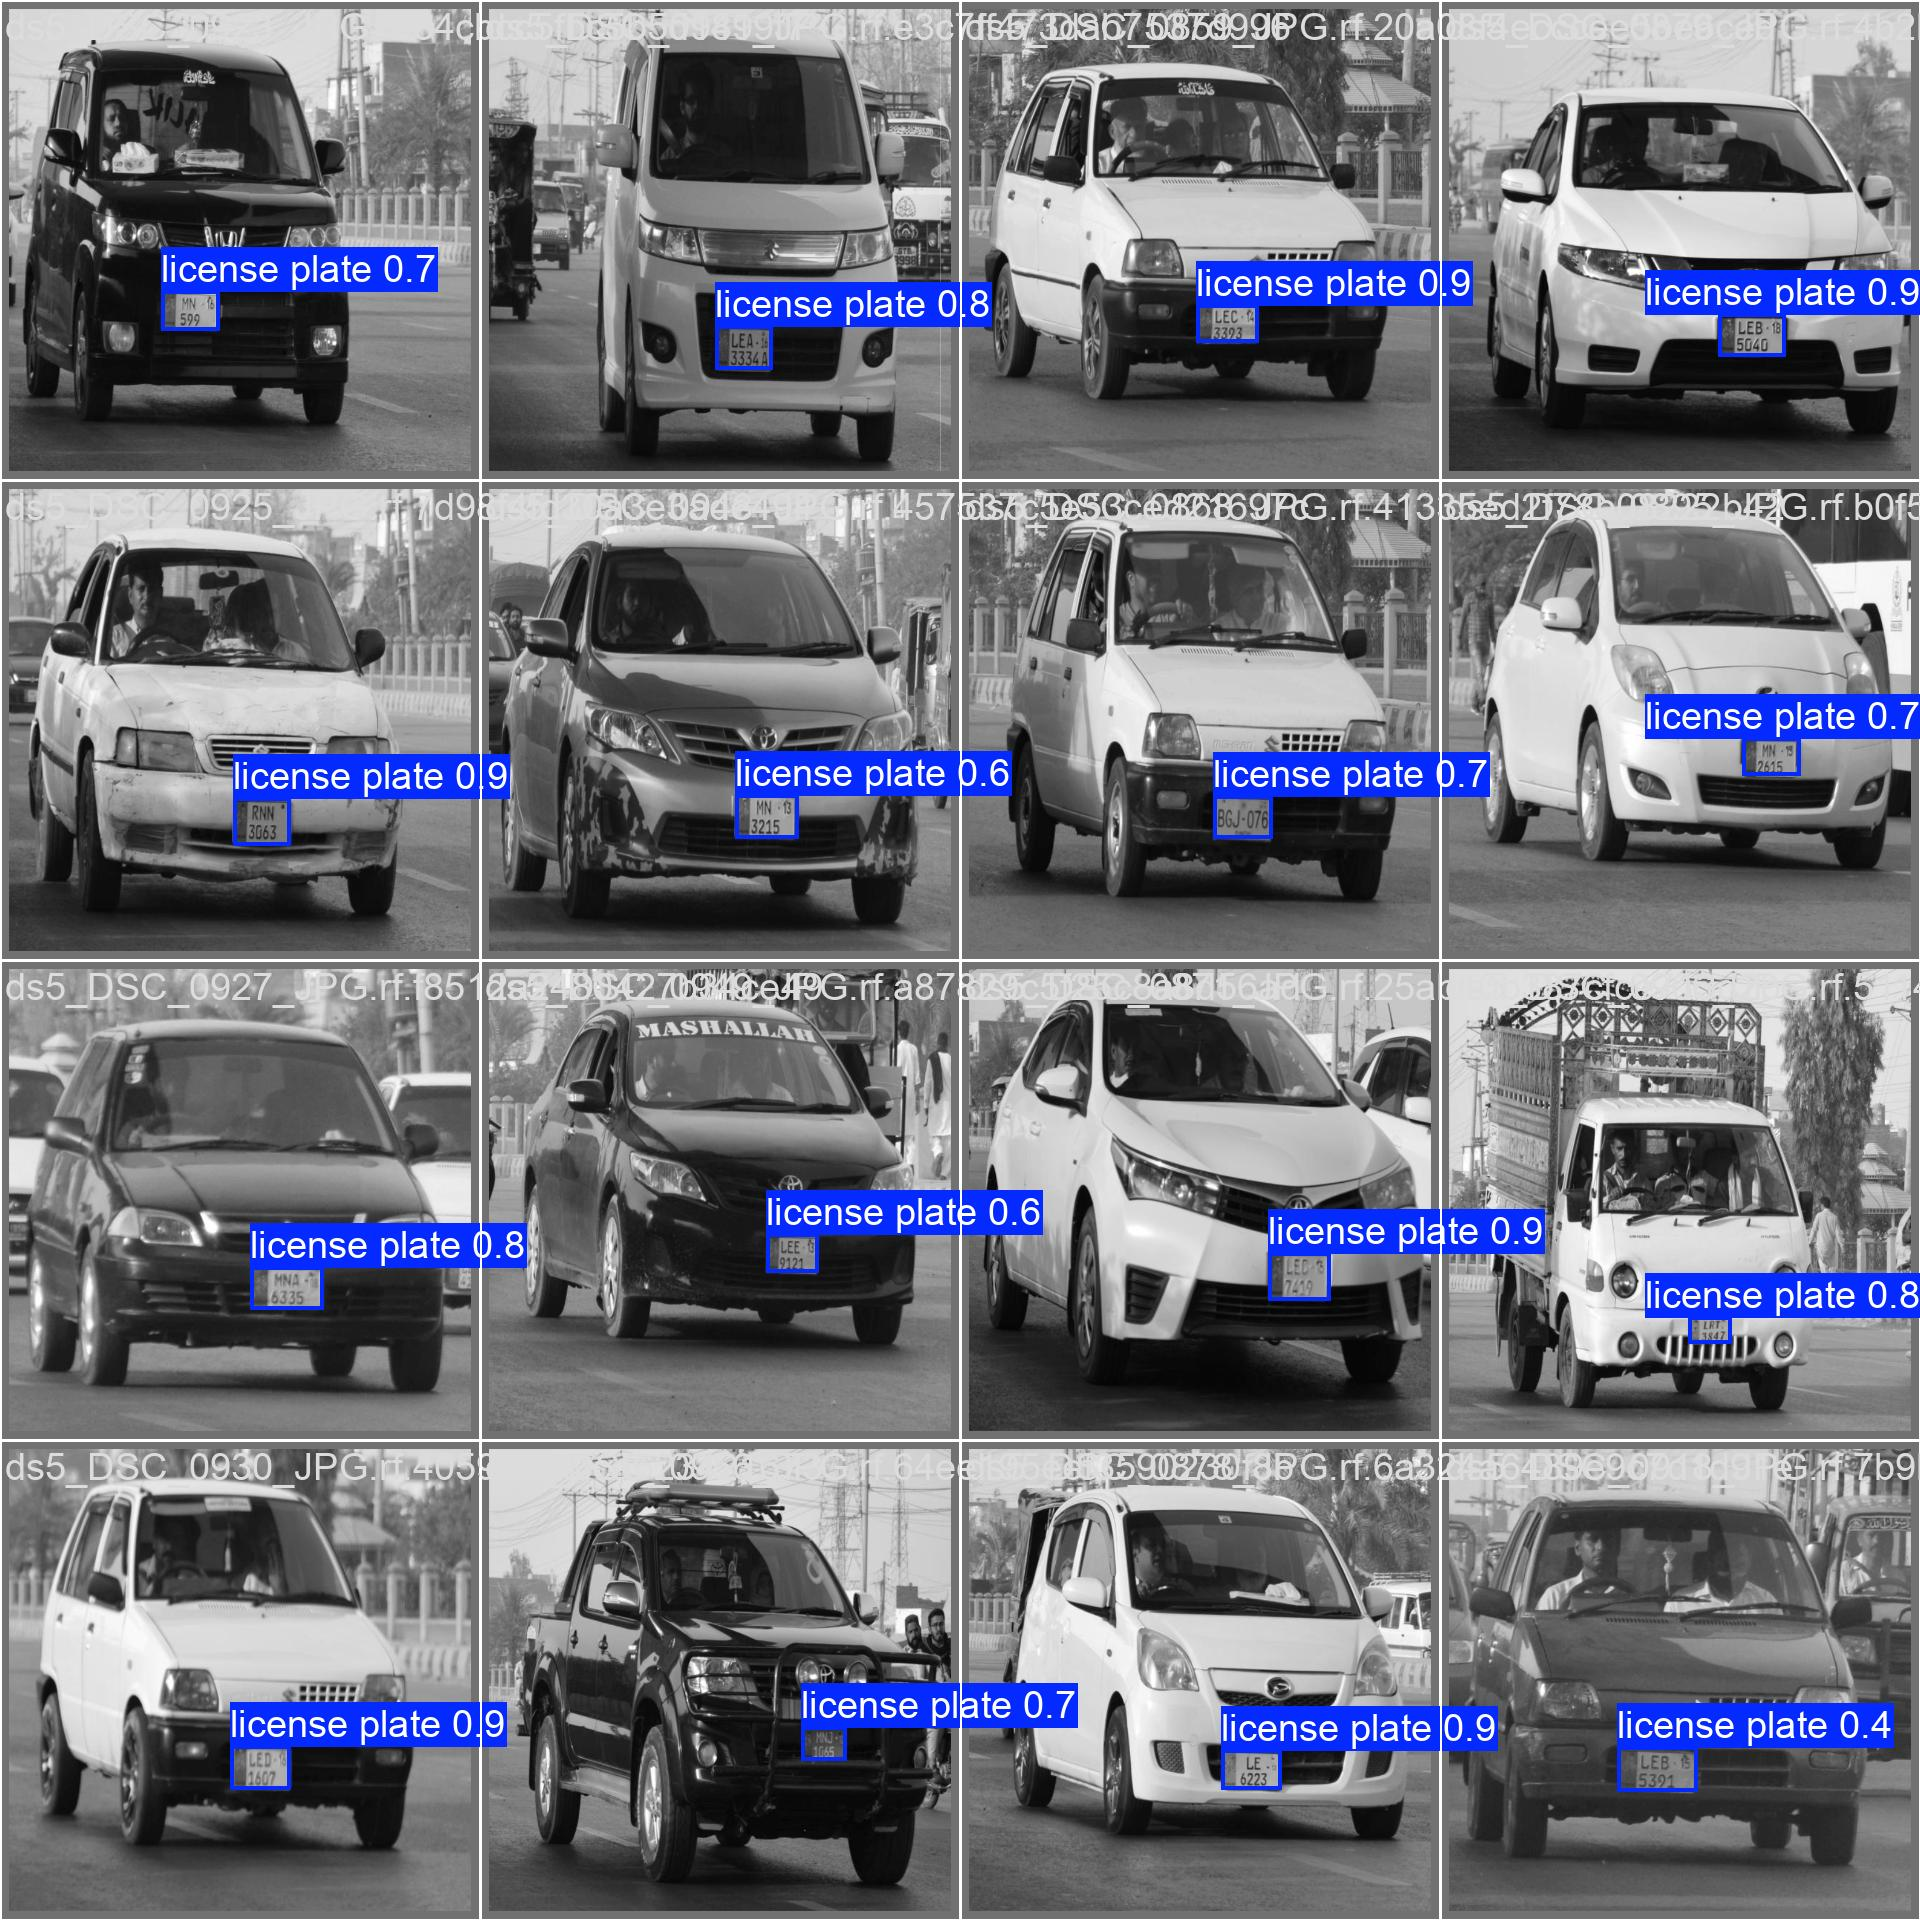

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
! yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data="/content/Pakistani License Plates (Merged) - YOLOv11/data.yaml"

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1283.4±440.8 MB/s, size: 46.3 KB)
val: Scanning /content/Pakistani License Plates (Merged) - YOLOv11/labels/valid.cache... 570 images, 0 backgrounds, 0 corrupt: 100% 570/570 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 36/36 [00:12<00:00,  2.92it/s]
                   all        570        610      0.755      0.713      0.758      0.483
Speed: 0.8ms preprocess, 16.9ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
! yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/Pakistani License Plates (Merged) - YOLOv11/images/test" save=True

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs

image 1/289 /content/Pakistani License Plates (Merged) - YOLOv11/images/test/ds1_DSC_0553_jpg.rf.016a19ce77de76fa87032f2fa594af5b.jpg: 800x800 1 license plate, 15.8ms
image 2/289 /content/Pakistani License Plates (Merged) - YOLOv11/images/test/ds1_DSC_0556_jpg.rf.f316952d826f4b42be3a088edd0cf39a.jpg: 800x800 2 license plates, 12.7ms
image 3/289 /content/Pakistani License Plates (Merged) - YOLOv11/images/test/ds1_DSC_0581_jpg.rf.48067aaa59088544a57f6b1369bd99db.jpg: 800x800 2 license plates, 12.4ms
image 4/289 /content/Pakistani License Plates (Merged) - YOLOv11/images/test/ds1_DSC_0865_JPG.rf.3afd85e4b51402ec68fdcd4a4b0ecd17.jpg: 800x800 1 license plate, 12.2ms
image 5/289 /content/Pakistani License Plates (Merged) - YOLOv11/images/test/ds1_DSC_0886_JPG.rf.7f1f71a50e7daa72962965d8c93c6181.jpg: 800x800 1 license plate, 

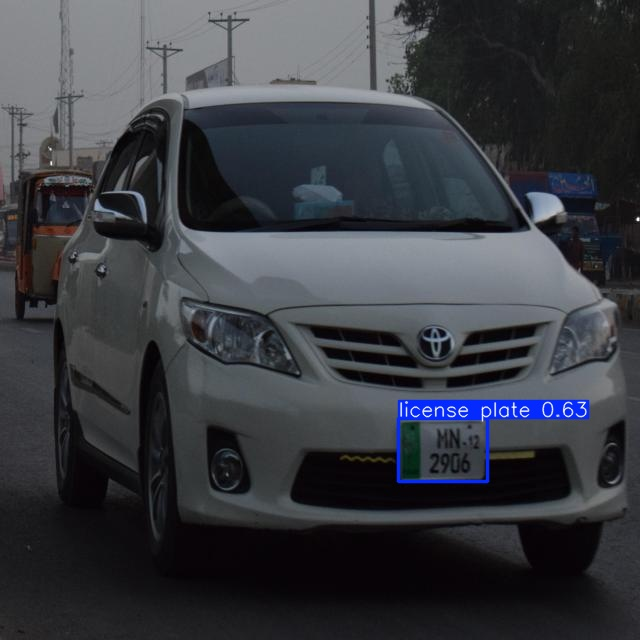

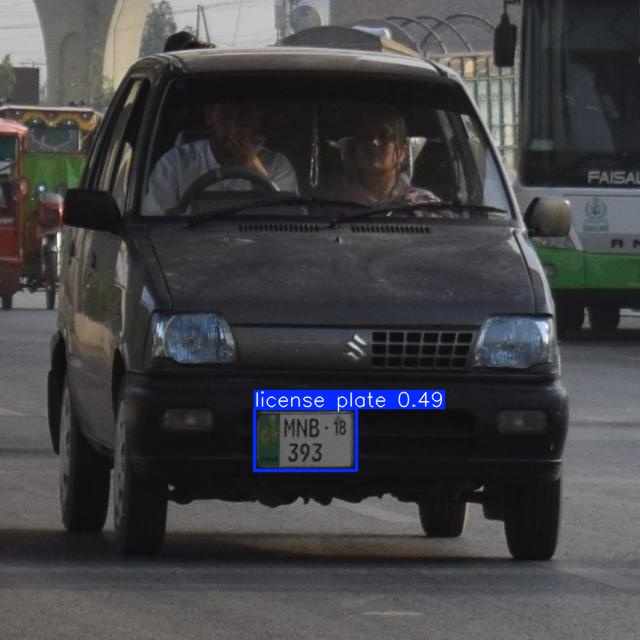

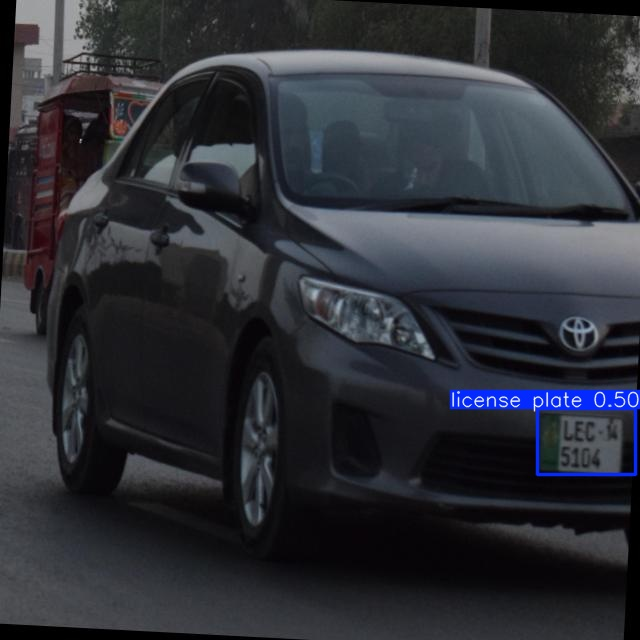

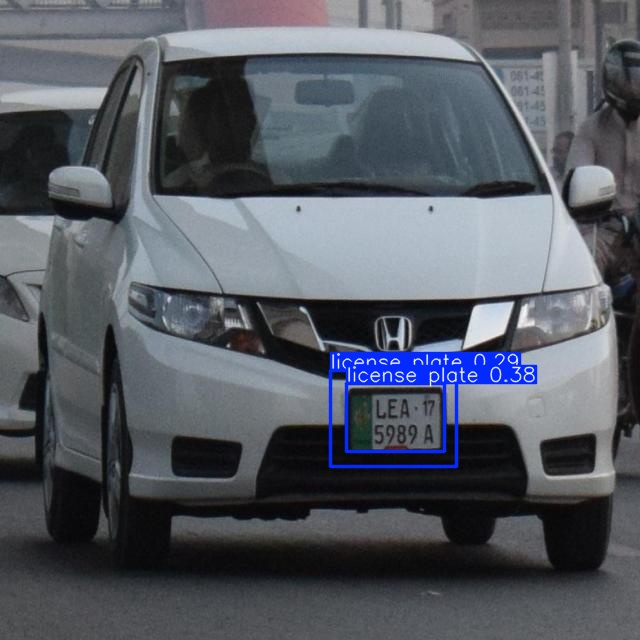

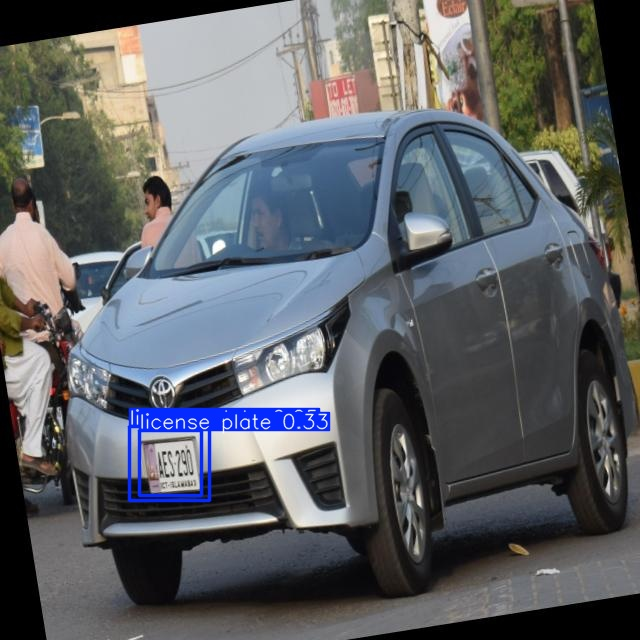

In [ ]:
import os
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:5]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

### Saving work to Gdrive

In [ ]:
! cp -r /content/runs /content/drive/MyDrive/yolo_runs_backup

### Resuming work

In [4]:
! cp -r /content/drive/MyDrive/yolo_runs_backup /content/runs

### Experimenting with multiple confidence thresholds

In [ ]:
! yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data="/content/Pakistani License Plates (Merged) - YOLOv11/data.yaml" conf=0.4

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1466.2±660.0 MB/s, size: 59.4 KB)
val: Scanning /content/Pakistani License Plates (Merged) - YOLOv11/labels/valid.cache... 570 images, 0 backgrounds, 0 corrupt: 100% 570/570 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 36/36 [00:23<00:00,  1.51it/s]
                   all        570        610      0.813      0.611      0.719      0.516
Speed: 1.9ms preprocess, 35.2ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
! yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data="/content/Pakistani License Plates (Merged) - YOLOv11/data.yaml" conf=0.325

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1563.6±631.9 MB/s, size: 49.5 KB)
val: Scanning /content/Pakistani License Plates (Merged) - YOLOv11/labels/valid.cache... 570 images, 0 backgrounds, 0 corrupt: 100% 570/570 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 36/36 [00:23<00:00,  1.55it/s]
                   all        570        610      0.751      0.721      0.753      0.526
Speed: 1.0ms preprocess, 35.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
! yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data="/content/Pakistani License Plates (Merged) - YOLOv11/data.yaml" conf=0.28

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1447.7±324.1 MB/s, size: 47.5 KB)
val: Scanning /content/Pakistani License Plates (Merged) - YOLOv11/labels/valid.cache... 570 images, 0 backgrounds, 0 corrupt: 100% 570/570 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 36/36 [00:23<00:00,  1.55it/s]
                   all        570        610      0.746      0.723      0.759      0.525
Speed: 1.5ms preprocess, 35.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
! yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.28 source="/content/Pakistani License Plates (Merged) - YOLOv11/images/test" save=True

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs

image 1/289 /content/Pakistani License Plates (Merged) - YOLOv11/images/test/ds1_DSC_0553_jpg.rf.016a19ce77de76fa87032f2fa594af5b.jpg: 800x800 1 license plate, 52.3ms
image 2/289 /content/Pakistani License Plates (Merged) - YOLOv11/images/test/ds1_DSC_0556_jpg.rf.f316952d826f4b42be3a088edd0cf39a.jpg: 800x800 2 license plates, 52.4ms
image 3/289 /content/Pakistani License Plates (Merged) - YOLOv11/images/test/ds1_DSC_0581_jpg.rf.48067aaa59088544a57f6b1369bd99db.jpg: 800x800 1 license plate, 52.3ms
image 4/289 /content/Pakistani License Plates (Merged) - YOLOv11/images/test/ds1_DSC_0865_JPG.rf.3afd85e4b51402ec68fdcd4a4b0ecd17.jpg: 800x800 1 license plate, 52.3ms
image 5/289 /content/Pakistani License Plates (Merged) - YOLOv11/images/test/ds1_DSC_0886_JPG.rf.7f1f71a50e7daa72962965d8c93c6181.jpg: 800x800 1 license plate, 31

In [ ]:
! cp -r /content/runs/detect/predict2 /content/drive/MyDrive/predict2

The run with the conf threshold of 0.28 has the highest mAP50 (0.759) and a competitive mAP50-95 (0.525), indicating good overall detection performance.

### Extracting text from predictions using easyOCR

In [5]:
! pip install easyocr opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 15.1 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import easyocr
from pathlib import Path
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator, colors

# === Configuration ===
image_dir = Path("/content/Pakistani License Plates (Merged) - YOLOv11/images/test")
output_dir = Path("predicted_images")
output_dir.mkdir(parents=True, exist_ok=True)
padding = 10  # pixels around bounding box

# Initialize EasyOCR (English, GPU)
reader = easyocr.Reader(['en'], gpu=True)

# Load YOLO model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Loop through all images
for image_path in sorted(image_dir.glob("*.[jp][pn]g")):
    im0 = cv2.imread(str(image_path))
    if im0 is None:
        print(f"❌ Could not load: {image_path}")
        continue

    # Run YOLO prediction
    results = model.predict(im0, verbose=False)[0].boxes
    boxes = results.xyxy.cpu()
    clss = results.cls.cpu()

    annotator = Annotator(im0, line_width=2)

    for cls, box in zip(clss, boxes):
        h, w, _ = im0.shape
        x1 = max(int(box[0]) - padding, 0)
        y1 = max(int(box[1]) - padding, 0)
        x2 = min(int(box[2]) + padding, w)
        y2 = min(int(box[3]) + padding, h)

        # Crop number plate
        cropped = im0[y1:y2, x1:x2]

        # OCR with EasyOCR (detailed output)
        result = reader.readtext(cropped, detail=1)  # returns (box, text, confidence)

        # Sort by vertical position (top-to-bottom)
        sorted_result = sorted(result, key=lambda x: x[0][0][1])  # y1 of box

        # Extract and join all lines
        text = " | ".join([r[1] for r in sorted_result]) if sorted_result else "None"

        print(f"[{image_path.name}] → {text}")
        annotator.box_label(box, label=text, color=colors(cls, True))

    # Save annotated image
    cv2.imwrite(str(output_dir / image_path.name), im0)

print(f"\n✅ All done! Annotated images saved in: {output_dir}")


[ds1_DSC_0553_jpg.rf.016a19ce77de76fa87032f2fa594af5b.jpg] → LEE | 5559
[ds1_DSC_0556_jpg.rf.f316952d826f4b42be3a088edd0cf39a.jpg] → LEA: 17 | 5289
[ds1_DSC_0556_jpg.rf.f316952d826f4b42be3a088edd0cf39a.jpg] → LEA : 17 | 5282 A
[ds1_DSC_0581_jpg.rf.48067aaa59088544a57f6b1369bd99db.jpg] → lea | 72208
[ds1_DSC_0581_jpg.rf.48067aaa59088544a57f6b1369bd99db.jpg] → 122 | ea | Lea | 72208
[ds1_DSC_0865_JPG.rf.3afd85e4b51402ec68fdcd4a4b0ecd17.jpg] → LRG | 7450
[ds1_DSC_0886_JPG.rf.7f1f71a50e7daa72962965d8c93c6181.jpg] → LEE ' 1 | 3085
[ds1_DSC_0920_JPG.rf.338f822521aab73920cacf5dce3e8b81.jpg] → MN | 18 | 199
[ds1_DSC_0925_JPG.rf.8ae1521f9495da6c17a791a1a95eb37d.jpg] → RNN | 3063
[ds1_DSC_0945_JPG.rf.5a59d5b0f72630b7ac616360d9dd08cc.jpg] → AWNJ-416 | SmoL
[ds1_DSC_0951_JPG.rf.0dbee682f51fae2894247c729eee14c2.jpg] → OT:3173
[ds1_DSC_0951_JPG.rf.0dbee682f51fae2894247c729eee14c2.jpg] → 01.5175 | CT:3173|
[ds1_DSC_0956_JPG.rf.6aea35ceca77d868c5a73f57b6193ea3.jpg] → MNJ | 1065
[ds1_DSC_0971x_jpg.rf.d

### Saving the annotated images

In [ ]:
! cp -r /content/predicted_images /content/drive/MyDrive/predicted_images_easyocr

### Infer from respective source function

In [20]:
import os
import cv2
import easyocr
import subprocess
from pathlib import Path
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator, colors

# === Configuration ===
padding = 10
reader = easyocr.Reader(['en'], gpu=True)
model = YOLO("/content/runs/detect/train/weights/best.pt")
output_dir = Path("predicted_output")
output_dir.mkdir(parents=True, exist_ok=True)

def infer_from_source(source):
    if isinstance(source, int) or (isinstance(source, str) and source.endswith((".mp4", ".avi"))):
        # --- Video or webcam ---
        cap = cv2.VideoCapture(source)
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps = cap.get(cv2.CAP_PROP_FPS) or 25  # fallback

        video_writer = None

        # Determine output filenames
        if isinstance(source, str) and os.path.isfile(source):
            video_name = Path(source).stem + "_annotated.mp4"
        else:
            video_name = "webcam_output.mp4"

        out_path = output_dir / video_name

        if cap.isOpened():
            fourcc = cv2.VideoWriter_fourcc(*"mp4v")
            video_writer = cv2.VideoWriter(str(out_path), fourcc, fps, (width, height))

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            annotated = process_frame(frame)
            if video_writer:
                video_writer.write(annotated)

        cap.release()
        if video_writer:
            video_writer.release()

        print(f"✅ Raw video saved to: {out_path}")

        # === Compress with ffmpeg ===
        compressed_path = output_dir / (Path(video_name).stem + "_compressed.mp4")
        compress_cmd = [
            "ffmpeg", "-y",
            "-i", str(out_path),
            "-vcodec", "libx264",
            "-crf", "23",
            str(compressed_path)
        ]

        try:
            subprocess.run(compress_cmd, check=True)
            print(f"✅ Compressed video saved to: {compressed_path}")
            os.remove(out_path)  # Clean up uncompressed video
            print(f"🗑️ Deleted uncompressed video: {out_path}")
        except subprocess.CalledProcessError as e:
            print("❌ Compression with ffmpeg failed:", e)

    elif isinstance(source, str) and os.path.isdir(source):
        # --- Directory of images ---
        image_paths = sorted(Path(source).glob("*.[jp][pn]g"))
        for image_path in image_paths:
            im0 = cv2.imread(str(image_path))
            if im0 is None:
                print(f"❌ Could not read: {image_path.name}")
                continue

            annotated = process_frame(im0)
            save_path = output_dir / image_path.name
            cv2.imwrite(str(save_path), annotated)
        print(f"✅ Annotated images saved to: {output_dir}")

    elif isinstance(source, str) and os.path.isfile(source):
        # --- Single image ---
        im0 = cv2.imread(source)
        if im0 is None:
            print(f"❌ Could not read image: {source}")
            return
        annotated = process_frame(im0)
        save_path = output_dir / Path(source).name
        cv2.imwrite(str(save_path), annotated)
        print(f"✅ Saved annotated image to: {save_path}")
    else:
        print("❌ Unsupported source format.")

def process_frame(im0):
    results = model.predict(im0, verbose=False)[0].boxes
    boxes = results.xyxy.cpu()
    clss = results.cls.cpu()
    annotator = Annotator(im0, line_width=2)

    for cls, box in zip(clss, boxes):
        h, w, _ = im0.shape
        x1 = max(int(box[0]) - padding, 0)
        y1 = max(int(box[1]) - padding, 0)
        x2 = min(int(box[2]) + padding, w)
        y2 = min(int(box[3]) + padding, h)

        cropped = im0[y1:y2, x1:x2]
        ocr_result = reader.readtext(cropped, detail=1)
        sorted_result = sorted(ocr_result, key=lambda x: x[0][0][1])
        text = " | ".join([r[1] for r in sorted_result]) if sorted_result else "None"
        annotator.box_label(box, label=text, color=colors(cls, True))

    return im0

In [14]:
# download the sample video file
safe_download("https://github.com/ultralytics/assets/releases/download/v0.0.0/anpr-demo-video.mp4")

PosixPath('anpr-demo-video.mp4')

In [21]:
infer_from_source("/content/anpr-demo-video.mp4")

✅ Raw video saved to: predicted_output/anpr-demo-video_annotated.mp4
✅ Compressed video saved to: predicted_output/anpr-demo-video_annotated_compressed.mp4
🗑️ Deleted uncompressed video: predicted_output/anpr-demo-video_annotated.mp4


In [27]:
infer_from_source("/content/17814089-sd_960_540_30fps.mp4")

✅ Raw video saved to: predicted_output/17814089-sd_960_540_30fps_annotated.mp4
✅ Compressed video saved to: predicted_output/17814089-sd_960_540_30fps_annotated_compressed.mp4
🗑️ Deleted uncompressed video: predicted_output/17814089-sd_960_540_30fps_annotated.mp4


In [29]:
infer_from_source("/content/17814090-sd_960_540_30fps.mp4")

✅ Raw video saved to: predicted_output/17814090-sd_960_540_30fps_annotated.mp4
✅ Compressed video saved to: predicted_output/17814090-sd_960_540_30fps_annotated_compressed.mp4
🗑️ Deleted uncompressed video: predicted_output/17814090-sd_960_540_30fps_annotated.mp4


In [28]:
infer_from_source("/content/19549787-hd_1080_1920_30fps.mp4")

✅ Raw video saved to: predicted_output/19549787-hd_1080_1920_30fps_annotated.mp4
✅ Compressed video saved to: predicted_output/19549787-hd_1080_1920_30fps_annotated_compressed.mp4
🗑️ Deleted uncompressed video: predicted_output/19549787-hd_1080_1920_30fps_annotated.mp4
